# DeepLabV3+ Transfer Learning Training Demo

DeepLabV3+ with interchangeable backbone transfer learning training demo
Net pretrained with COCO val2017, then fine-tuned with Yamaha-CMU Off-Road Dataset

In [12]:
import os.path as op
import sys
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'
import torch
from torchvision import models
from torchvision.models.segmentation.deeplabv3 import DeepLabHead
import numpy as np
from PIL import Image
import yaml

sys.path.append('H:/Courses/DL_Projects/IS_project/semantic-segmentation/')
from utils import get_dataloader, Trainer, display_example_pair
from models import DeepLabWrapper

In [ ]:
torch.cuda.is_available()
# code to see  if GPU is available, and if not run on CPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

def check_gpu():
    if torch.cuda.is_available():
        print("Num GPUs Available:", torch.cuda.device_count())
        for i in range(torch.cuda.device_count()):
            print(f"GPU {i}:", torch.cuda.get_device_name(i))
        print("Using device:", device)
    else:
        print("No GPU device found.")

check_gpu()

In [ ]:
np.random.seed(42)

Set up all of our path variables and hyperparamters needed to train the model. Adjust accordingly to your needs

In [13]:
with open('H:/Courses/DL_Projects/IS_project/semantic-segmentation/config/config.yaml', 'r') as f:
    config = yaml.safe_load(f)

Set up the `data` and `model` directories

In [14]:
os.makedirs('H:/Courses/DL_Projects/IS_project/semantic-segmentation/data', exist_ok = True)
os.makedirs('H:/Courses/DL_Projects/IS_project/semantic-segmentation/runs', exist_ok = True)

---

**IMPORTANT:** we require that you now download the Yamaha CMU Off-Road Dataset from the following url before proceding. The directory and files should be unzipped and placed in the `data` directory of this repository, created above.

**Link to download dataset:** https://theairlab.org/yamaha-offroad-dataset/

---

Load an example image from the training set

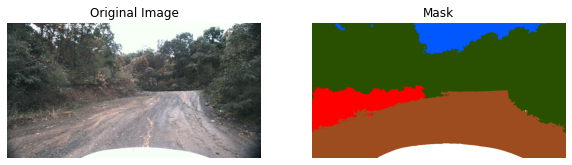

In [15]:
example_image = Image.open(op.join('H:/Courses/DL_Projects/IS_project/semantic-segmentation/', config['DATA_PATH'], 'train/iid000008/rgb.jpg'))
example_mask = Image.open(op.join('H:/Courses/DL_Projects/IS_project/semantic-segmentation/', config['DATA_PATH'], 'train/iid000008/labels.png'))
image_display = np.array(example_image)
mask_display = np.array(example_mask.convert('RGB'))
display_example_pair(image_display, mask_display)

Load data into dataloaders

In [16]:
dataloaders = get_dataloader(op.join('H:/Courses/DL_Projects/IS_project/semantic-segmentation/', config['DATA_PATH']),
                             batch_size=config['BATCH_SIZE'],
                             resize_shape=(config['IMG_HEIGHT'],
                             config['IMG_WIDTH']))

### Model Selection

Create the model. Note that the model is pretrained on COCO val2017. Replace the output layer with 8 mask channels and the correct number of nodes for the last layer

In [17]:
model = DeepLabWrapper(backbone=config['BACKBONE'],
                       num_mask_channels=config['NUM_MASK_CHANNELS'],
                       pretrained=True,
                       progress=True,
                       aux_loss=True)

Freeze earlier layers

In [ ]:
# freeze_layers(model, 0, 14)

Select the optimizer and loss function

In [18]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters, lr=float(config['LEARNING_RATE']))

Train the model

In [19]:
trainer = Trainer(model, dataloaders, criterion, optimizer, num_epochs=config['NUM_EPOCHS'], is_inception=config['IS_INCEPTION'])

In [20]:
trained_model, val_mean_iou_history = trainer.train()


Epoch 1/60
----------


100%|██████████| 465/465 [01:40<00:00,  4.63it/s]


train Loss: 1.3333 mIoU: 0.8236


100%|██████████| 72/72 [00:05<00:00, 12.55it/s]


valid Loss: 3.8029 mIoU: 0.2090

Epoch 2/60
----------


100%|██████████| 465/465 [01:39<00:00,  4.67it/s]


train Loss: 1.1098 mIoU: 0.8416


100%|██████████| 72/72 [00:05<00:00, 12.30it/s]


valid Loss: 1.9428 mIoU: 0.6862

Epoch 3/60
----------


100%|██████████| 465/465 [01:40<00:00,  4.63it/s]


train Loss: 1.0381 mIoU: 0.8453


100%|██████████| 72/72 [00:05<00:00, 12.24it/s]


valid Loss: 2.1923 mIoU: 0.5604

Epoch 4/60
----------


100%|██████████| 465/465 [01:41<00:00,  4.59it/s]


train Loss: 0.9822 mIoU: 0.8518


100%|██████████| 72/72 [00:05<00:00, 12.25it/s]


valid Loss: 2.0270 mIoU: 0.5607

Epoch 5/60
----------


100%|██████████| 465/465 [01:42<00:00,  4.53it/s]


train Loss: 0.9208 mIoU: 0.8594


100%|██████████| 72/72 [00:05<00:00, 12.72it/s]


valid Loss: 1.5305 mIoU: 0.6941

Epoch 6/60
----------


100%|██████████| 465/465 [01:42<00:00,  4.54it/s]


train Loss: 0.8861 mIoU: 0.8645


100%|██████████| 72/72 [00:05<00:00, 12.23it/s]


valid Loss: 1.6467 mIoU: 0.7347

Epoch 7/60
----------


100%|██████████| 465/465 [01:41<00:00,  4.59it/s]


train Loss: 0.8412 mIoU: 0.8730


100%|██████████| 72/72 [00:05<00:00, 12.74it/s]


valid Loss: 2.2531 mIoU: 0.6787

Epoch 8/60
----------


100%|██████████| 465/465 [01:41<00:00,  4.58it/s]


train Loss: 0.7961 mIoU: 0.8757


100%|██████████| 72/72 [00:05<00:00, 12.69it/s]


valid Loss: 1.9206 mIoU: 0.7236

Epoch 9/60
----------


100%|██████████| 465/465 [01:41<00:00,  4.60it/s]


train Loss: 0.7621 mIoU: 0.8771


100%|██████████| 72/72 [00:05<00:00, 12.52it/s]


valid Loss: 1.4597 mIoU: 0.6840

Epoch 10/60
----------


100%|██████████| 465/465 [01:41<00:00,  4.59it/s]


train Loss: 0.7574 mIoU: 0.8812


100%|██████████| 72/72 [00:05<00:00, 12.86it/s]


valid Loss: 2.1306 mIoU: 0.6722

Epoch 11/60
----------


100%|██████████| 465/465 [01:40<00:00,  4.61it/s]


train Loss: 0.7107 mIoU: 0.8842


100%|██████████| 72/72 [00:05<00:00, 12.70it/s]


valid Loss: 2.7854 mIoU: 0.6192

Epoch 12/60
----------


100%|██████████| 465/465 [01:41<00:00,  4.60it/s]


train Loss: 0.6686 mIoU: 0.8880


100%|██████████| 72/72 [00:05<00:00, 12.60it/s]


valid Loss: 2.7238 mIoU: 0.5341

Epoch 13/60
----------


100%|██████████| 465/465 [01:41<00:00,  4.59it/s]


train Loss: 0.6306 mIoU: 0.8921


100%|██████████| 72/72 [00:05<00:00, 12.84it/s]


valid Loss: 3.6007 mIoU: 0.7622

Epoch 14/60
----------


100%|██████████| 465/465 [01:40<00:00,  4.60it/s]


train Loss: 0.5877 mIoU: 0.8974


100%|██████████| 72/72 [00:05<00:00, 12.73it/s]


valid Loss: 2.6143 mIoU: 0.7093

Epoch 15/60
----------


100%|██████████| 465/465 [01:41<00:00,  4.60it/s]


train Loss: 0.5556 mIoU: 0.9055


100%|██████████| 72/72 [00:05<00:00, 12.61it/s]


valid Loss: 3.5487 mIoU: 0.7872

Epoch 16/60
----------


100%|██████████| 465/465 [03:27<00:00,  2.24it/s]


train Loss: 0.5678 mIoU: 0.9047


100%|██████████| 72/72 [00:15<00:00,  4.55it/s]


valid Loss: 2.1407 mIoU: 0.6848

Epoch 17/60
----------


100%|██████████| 465/465 [04:52<00:00,  1.59it/s]


train Loss: 0.5034 mIoU: 0.9125


100%|██████████| 72/72 [00:05<00:00, 13.27it/s]


valid Loss: 2.0942 mIoU: 0.6760

Epoch 18/60
----------


100%|██████████| 465/465 [01:39<00:00,  4.69it/s]


train Loss: 0.4867 mIoU: 0.9225


100%|██████████| 72/72 [00:05<00:00, 13.28it/s]


valid Loss: 3.0611 mIoU: 0.7292

Epoch 19/60
----------


100%|██████████| 465/465 [01:39<00:00,  4.69it/s]


train Loss: 0.4328 mIoU: 0.9308


100%|██████████| 72/72 [00:05<00:00, 13.25it/s]


valid Loss: 5.8669 mIoU: 0.6139

Epoch 20/60
----------


100%|██████████| 465/465 [01:39<00:00,  4.67it/s]


train Loss: 0.4274 mIoU: 0.9390


100%|██████████| 72/72 [00:05<00:00, 13.32it/s]


valid Loss: 3.1161 mIoU: 0.8193

Epoch 21/60
----------


100%|██████████| 465/465 [01:39<00:00,  4.69it/s]


train Loss: 0.4380 mIoU: 0.9347


100%|██████████| 72/72 [00:05<00:00, 12.97it/s]


valid Loss: 3.6172 mIoU: 0.6724

Epoch 22/60
----------


100%|██████████| 465/465 [01:39<00:00,  4.67it/s]


train Loss: 0.3598 mIoU: 0.9453


100%|██████████| 72/72 [00:05<00:00, 12.81it/s]


valid Loss: 3.3485 mIoU: 0.6063

Epoch 23/60
----------


100%|██████████| 465/465 [01:39<00:00,  4.66it/s]


train Loss: 0.3418 mIoU: 0.9483


100%|██████████| 72/72 [00:05<00:00, 13.04it/s]


valid Loss: 6.0530 mIoU: 0.5180

Epoch 24/60
----------


100%|██████████| 465/465 [01:39<00:00,  4.68it/s]


train Loss: 0.3265 mIoU: 0.9522


100%|██████████| 72/72 [00:05<00:00, 12.82it/s]


valid Loss: 7.4796 mIoU: 0.4380

Epoch 25/60
----------


100%|██████████| 465/465 [01:40<00:00,  4.63it/s]


train Loss: 0.2981 mIoU: 0.9575


100%|██████████| 72/72 [00:05<00:00, 13.20it/s]


valid Loss: 6.5313 mIoU: 0.4641

Epoch 26/60
----------


100%|██████████| 465/465 [01:39<00:00,  4.65it/s]


train Loss: 0.2698 mIoU: 0.9619


100%|██████████| 72/72 [00:05<00:00, 12.80it/s]


valid Loss: 6.7959 mIoU: 0.4729

Epoch 27/60
----------


100%|██████████| 465/465 [01:40<00:00,  4.64it/s]


train Loss: 0.2984 mIoU: 0.9570


100%|██████████| 72/72 [00:05<00:00, 13.01it/s]


valid Loss: 5.6995 mIoU: 0.5031

Epoch 28/60
----------


100%|██████████| 465/465 [01:40<00:00,  4.64it/s]


train Loss: 0.2940 mIoU: 0.9553


100%|██████████| 72/72 [00:05<00:00, 12.90it/s]


valid Loss: 9.0508 mIoU: 0.4842

Epoch 29/60
----------


100%|██████████| 465/465 [01:40<00:00,  4.65it/s]


train Loss: 0.2921 mIoU: 0.9626


100%|██████████| 72/72 [00:05<00:00, 13.22it/s]


valid Loss: 5.9941 mIoU: 0.4902

Epoch 30/60
----------


100%|██████████| 465/465 [01:39<00:00,  4.67it/s]


train Loss: 0.3180 mIoU: 0.9536


100%|██████████| 72/72 [00:05<00:00, 12.78it/s]


valid Loss: 8.6953 mIoU: 0.4205

Epoch 31/60
----------


100%|██████████| 465/465 [01:40<00:00,  4.64it/s]


train Loss: 0.2365 mIoU: 0.9653


100%|██████████| 72/72 [00:05<00:00, 12.99it/s]


valid Loss: 35.1735 mIoU: 0.4039

Epoch 32/60
----------


100%|██████████| 465/465 [01:40<00:00,  4.62it/s]


train Loss: 0.2193 mIoU: 0.9676


100%|██████████| 72/72 [00:05<00:00, 12.89it/s]


valid Loss: 31.2626 mIoU: 0.3216

Epoch 33/60
----------


100%|██████████| 465/465 [01:40<00:00,  4.64it/s]


train Loss: 0.2023 mIoU: 0.9721


100%|██████████| 72/72 [00:05<00:00, 12.74it/s]


valid Loss: 9.9233 mIoU: 0.3903

Epoch 34/60
----------


100%|██████████| 465/465 [01:40<00:00,  4.64it/s]


train Loss: 0.1836 mIoU: 0.9749


100%|██████████| 72/72 [00:05<00:00, 13.18it/s]


valid Loss: 31.7738 mIoU: 0.4174

Epoch 35/60
----------


100%|██████████| 465/465 [01:40<00:00,  4.61it/s]


train Loss: 0.1767 mIoU: 0.9761


100%|██████████| 72/72 [00:05<00:00, 12.94it/s]


valid Loss: 41.8090 mIoU: 0.4437

Epoch 36/60
----------


100%|██████████| 465/465 [01:40<00:00,  4.62it/s]


train Loss: 0.2060 mIoU: 0.9707


100%|██████████| 72/72 [00:05<00:00, 12.89it/s]


valid Loss: 26.3640 mIoU: 0.4080

Epoch 37/60
----------


100%|██████████| 465/465 [01:41<00:00,  4.60it/s]


train Loss: 0.2607 mIoU: 0.9635


100%|██████████| 72/72 [00:05<00:00, 12.42it/s]


valid Loss: 3.5605 mIoU: 0.7447

Epoch 38/60
----------


100%|██████████| 465/465 [01:41<00:00,  4.60it/s]


train Loss: 0.2046 mIoU: 0.9714


100%|██████████| 72/72 [00:05<00:00, 13.10it/s]


valid Loss: 58.7165 mIoU: 0.4648

Epoch 39/60
----------


100%|██████████| 465/465 [01:40<00:00,  4.61it/s]


train Loss: 0.1761 mIoU: 0.9770


100%|██████████| 72/72 [00:05<00:00, 13.02it/s]


valid Loss: 12.6284 mIoU: 0.4869

Epoch 40/60
----------


100%|██████████| 465/465 [01:40<00:00,  4.62it/s]


train Loss: 0.1748 mIoU: 0.9757


100%|██████████| 72/72 [00:05<00:00, 13.16it/s]


valid Loss: 26.1236 mIoU: 0.4203

Epoch 41/60
----------


100%|██████████| 465/465 [01:40<00:00,  4.61it/s]


train Loss: 0.1543 mIoU: 0.9791


100%|██████████| 72/72 [00:05<00:00, 13.01it/s]


valid Loss: 74.7145 mIoU: 0.5440

Epoch 42/60
----------


100%|██████████| 465/465 [01:40<00:00,  4.63it/s]


train Loss: 0.1381 mIoU: 0.9805


100%|██████████| 72/72 [00:05<00:00, 12.73it/s]


valid Loss: 16.8186 mIoU: 0.3995

Epoch 43/60
----------


100%|██████████| 465/465 [01:40<00:00,  4.61it/s]


train Loss: 0.3802 mIoU: 0.9414


100%|██████████| 72/72 [00:05<00:00, 13.15it/s]


valid Loss: 7.5694 mIoU: 0.5159

Epoch 44/60
----------


100%|██████████| 465/465 [01:41<00:00,  4.59it/s]


train Loss: 0.2568 mIoU: 0.9665


100%|██████████| 72/72 [00:05<00:00, 12.83it/s]


valid Loss: 10.3164 mIoU: 0.4631

Epoch 45/60
----------


100%|██████████| 465/465 [01:41<00:00,  4.60it/s]


train Loss: 0.2024 mIoU: 0.9741


100%|██████████| 72/72 [00:05<00:00, 12.87it/s]


valid Loss: 26.1717 mIoU: 0.5519

Epoch 46/60
----------


100%|██████████| 465/465 [01:40<00:00,  4.63it/s]


train Loss: 0.1446 mIoU: 0.9797


100%|██████████| 72/72 [00:05<00:00, 13.01it/s]


valid Loss: 68.3758 mIoU: 0.3808

Epoch 47/60
----------


100%|██████████| 465/465 [01:40<00:00,  4.62it/s]


train Loss: 0.1328 mIoU: 0.9816


100%|██████████| 72/72 [00:05<00:00, 13.03it/s]


valid Loss: 28.0161 mIoU: 0.5341

Epoch 48/60
----------


100%|██████████| 465/465 [01:40<00:00,  4.64it/s]


train Loss: 0.1231 mIoU: 0.9824


100%|██████████| 72/72 [00:05<00:00, 13.12it/s]


valid Loss: 35.8205 mIoU: 0.4174

Epoch 49/60
----------


100%|██████████| 465/465 [01:40<00:00,  4.63it/s]


train Loss: 0.1208 mIoU: 0.9823


100%|██████████| 72/72 [00:05<00:00, 13.06it/s]


valid Loss: 44.2033 mIoU: 0.5236

Epoch 50/60
----------


100%|██████████| 465/465 [01:40<00:00,  4.62it/s]


train Loss: 0.1194 mIoU: 0.9825


100%|██████████| 72/72 [00:05<00:00, 13.06it/s]


valid Loss: 27.5556 mIoU: 0.6219

Epoch 51/60
----------


100%|██████████| 465/465 [01:40<00:00,  4.62it/s]


train Loss: 0.1204 mIoU: 0.9827


100%|██████████| 72/72 [00:05<00:00, 13.02it/s]


valid Loss: 21.9146 mIoU: 0.6213

Epoch 52/60
----------


100%|██████████| 465/465 [01:40<00:00,  4.62it/s]


train Loss: 0.1211 mIoU: 0.9825


100%|██████████| 72/72 [00:05<00:00, 13.11it/s]


valid Loss: 14.8940 mIoU: 0.6461

Epoch 53/60
----------


100%|██████████| 465/465 [01:40<00:00,  4.64it/s]


train Loss: 0.1192 mIoU: 0.9828


100%|██████████| 72/72 [00:05<00:00, 12.55it/s]


valid Loss: 11.8069 mIoU: 0.5216

Epoch 54/60
----------


100%|██████████| 465/465 [01:41<00:00,  4.60it/s]


train Loss: 0.3751 mIoU: 0.9566


100%|██████████| 72/72 [00:05<00:00, 13.07it/s]


valid Loss: 286.6796 mIoU: 0.7848

Epoch 55/60
----------


100%|██████████| 465/465 [01:40<00:00,  4.65it/s]


train Loss: 0.2725 mIoU: 0.9633


100%|██████████| 72/72 [00:05<00:00, 13.13it/s]


valid Loss: 356.5188 mIoU: 0.2926

Epoch 56/60
----------


100%|██████████| 465/465 [01:39<00:00,  4.66it/s]


train Loss: 0.1394 mIoU: 0.9811


100%|██████████| 72/72 [00:05<00:00, 13.13it/s]


valid Loss: 119.5552 mIoU: 0.2865

Epoch 57/60
----------


100%|██████████| 465/465 [01:39<00:00,  4.67it/s]


train Loss: 0.1145 mIoU: 0.9839


100%|██████████| 72/72 [00:05<00:00, 13.12it/s]


valid Loss: 148.2429 mIoU: 0.3284

Epoch 58/60
----------


100%|██████████| 465/465 [01:39<00:00,  4.68it/s]


train Loss: 0.1077 mIoU: 0.9844


100%|██████████| 72/72 [00:05<00:00, 13.01it/s]


valid Loss: 103.6072 mIoU: 0.3815

Epoch 59/60
----------


100%|██████████| 465/465 [01:39<00:00,  4.67it/s]


train Loss: 0.1032 mIoU: 0.9848


100%|██████████| 72/72 [00:05<00:00, 12.94it/s]


valid Loss: 93.1936 mIoU: 0.3356

Epoch 60/60
----------


100%|██████████| 465/465 [01:39<00:00,  4.67it/s]


train Loss: 0.1013 mIoU: 0.9851


100%|██████████| 72/72 [00:05<00:00, 13.05it/s]

valid Loss: 91.0887 mIoU: 0.3595

Training complete in 111m 14s
Best val mean IoU: 0.819327


---
Save the entire model

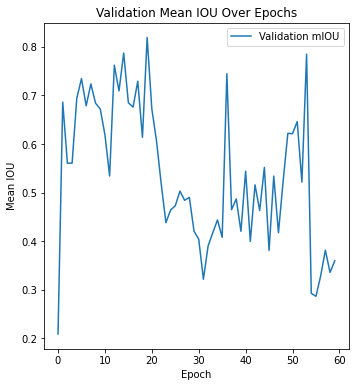

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(val_mean_iou_history, label='Validation mIOU')
plt.title('Validation Mean IOU Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean IOU')
plt.legend()


In [22]:
model.save_model(op.join('H:/Courses/DL_Projects/IS_project/semantic-segmentation/', config['SAVE_MODEL_PATH']))

In [1]:
import re
import matplotlib.pyplot as plt

# Path to your log file
file_path = 'result_mobilenet.txt'

# Initialize lists to store the extracted data
train_losses = []
valid_losses = []
train_mious = []
valid_mious = []

# Regular expression patterns to find losses and mIoUs
loss_pattern = r'train Loss: ([\d.]+) mIoU: ([\d.]+).*?valid Loss: ([\d.]+) mIoU: ([\d.]+)'

# Read the file and extract data
with open(file_path, 'r') as file:
    file_contents = file.read()
    matches = re.findall(loss_pattern, file_contents, re.S)
    for match in matches:
        train_losses.append(float(match[0]))
        train_mious.append(float(match[1]))
        valid_losses.append(float(match[2]))
        valid_mious.append(float(match[3]))

# Verify the extracted data
print("Training Losses:", train_losses)
print("Validation Losses:", valid_losses)
print("Training mIOUs:", train_mious)
print("Validation mIOUs:", valid_mious)


Training Losses: [2.1645, 2.0996, 2.0366, 1.9755, 1.9162, 1.8587, 1.803, 1.7489, 1.6964, 1.6455, 1.5962, 1.5483, 1.5018, 1.4568, 1.4131, 1.3707, 1.3296, 1.2897, 1.251, 1.2134, 1.177, 1.1417, 1.1075, 1.0743, 1.042, 1.0108, 0.9804, 0.951, 0.9225, 0.8948, 0.868, 0.8419, 0.8167, 0.7922, 0.7684, 0.7454, 0.723, 0.7013, 0.6803, 0.6599, 0.6401, 0.6209, 0.6022, 0.5842, 0.5666, 0.5496, 0.5332, 0.5172, 0.5017, 0.4866, 0.472, 0.4578, 0.4441, 0.4308, 0.4179, 0.4053, 0.3932, 0.3814, 0.3699, 0.3588]
Validation Losses: [1.7, 1.658, 1.5987, 1.5644, 1.5464, 1.4888, 1.4729, 1.4408, 1.3894, 1.3539, 1.326, 1.2983, 1.2579, 1.2382, 1.1903, 1.1634, 1.126, 1.1184, 1.1115, 1.0361, 0.9803, 0.9494, 0.9494, 0.9167, 0.8895, 0.8644, 0.8587, 0.837, 0.837, 0.8072, 0.7542, 0.733, 0.733, 0.733, 0.718, 0.6998, 0.6805, 0.6759, 0.6759, 0.6633, 0.6629, 0.6455, 0.5987, 0.5416, 0.5315, 0.525, 0.525, 0.525, 0.5181, 0.5181, 0.5181, 0.5181, 0.5012, 0.5012, 0.463, 0.463, 0.45, 0.4244, 0.4244, 0.4244]
Training mIOUs: [0.8427, 0.84

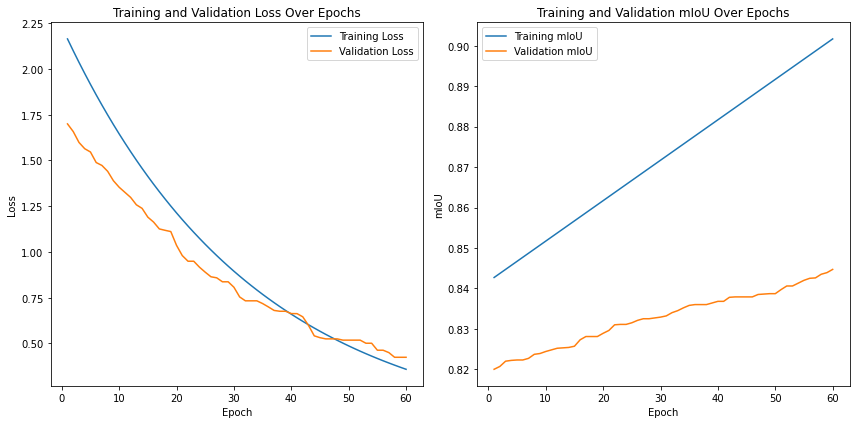

In [2]:
epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(12, 6))

# Plot training and validation losses
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, valid_losses, label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation mIOUs
plt.subplot(1, 2, 2)
plt.plot(epochs, train_mious, label='Training mIoU')
plt.plot(epochs, valid_mious, label='Validation mIoU')
plt.title('Training and Validation mIoU Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('mIoU')
plt.legend()

plt.tight_layout()
plt.show()


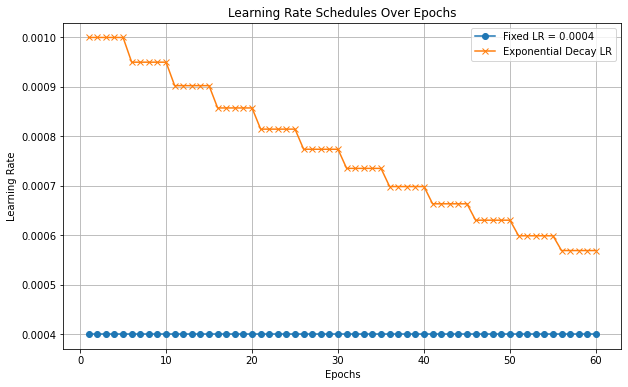

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Number of epochs
epochs = 60

# Fixed learning rate
fixed_lr = 0.0004

# Exponential decay learning rate
initial_lr = 0.001
decay_rate = 0.95
decay_step = 5

# Calculate the exponential decay learning rates for each epoch
exponential_decay_lr = [initial_lr * (decay_rate ** (epoch // decay_step)) for epoch in range(epochs)]

# Constant learning rate array
fixed_lr_values = [fixed_lr] * epochs

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), fixed_lr_values, label=f'Fixed LR = {fixed_lr}', marker='o')
plt.plot(range(1, epochs + 1), exponential_decay_lr, label='Exponential Decay LR', marker='x')
plt.title('Learning Rate Schedules Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.legend()
plt.grid(True)
plt.show()
